In [5]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
abortion = pd.read_excel('abortion_data.xlsx', index_col=0) 
abortion.columns

Index(['% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in the no. of abort

In [7]:
abortion['Reported public expenditures for abortions (in 000s of dollars), state, 2015'].values

array([0, 216, 11, 0, 32613, 0, 184, 0, 0, 0, 'nr', 253, 0, 61, 0, 'nr',
       'nr', 0, 0, 0, 5000, 1400, 0, 904, 0, 0, 238, 'nr', 0, 'nr', 5580,
       453, 16306, 7, 'nr', 'nr', 0, 1152, 0, 0, 0, 'nr', 0, 0, 0, 478,
       97, 5617, 375, 'nr', 0], dtype=object)

Correlation between Federal Expenditures and Number of Abortions: 0.017
Correlation between State Expenditures and Number of Abortions: 0.839

Data used for analysis:
                  State  Federal_Expenditures_2015  State_Expenditures_2015  \
0               Alabama                       22.0                      0.0   
1                Alaska                        0.0                    216.0   
2               Arizona                       28.0                     11.0   
3              Arkansas                        0.0                      0.0   
4            California                        0.0                  32613.0   
5              Colorado                        0.0                      0.0   
6           Connecticut                        0.0                    184.0   
7              Delaware                      500.0                      0.0   
8  District of Columbia                        0.0                      0.0   
9               Florida                    

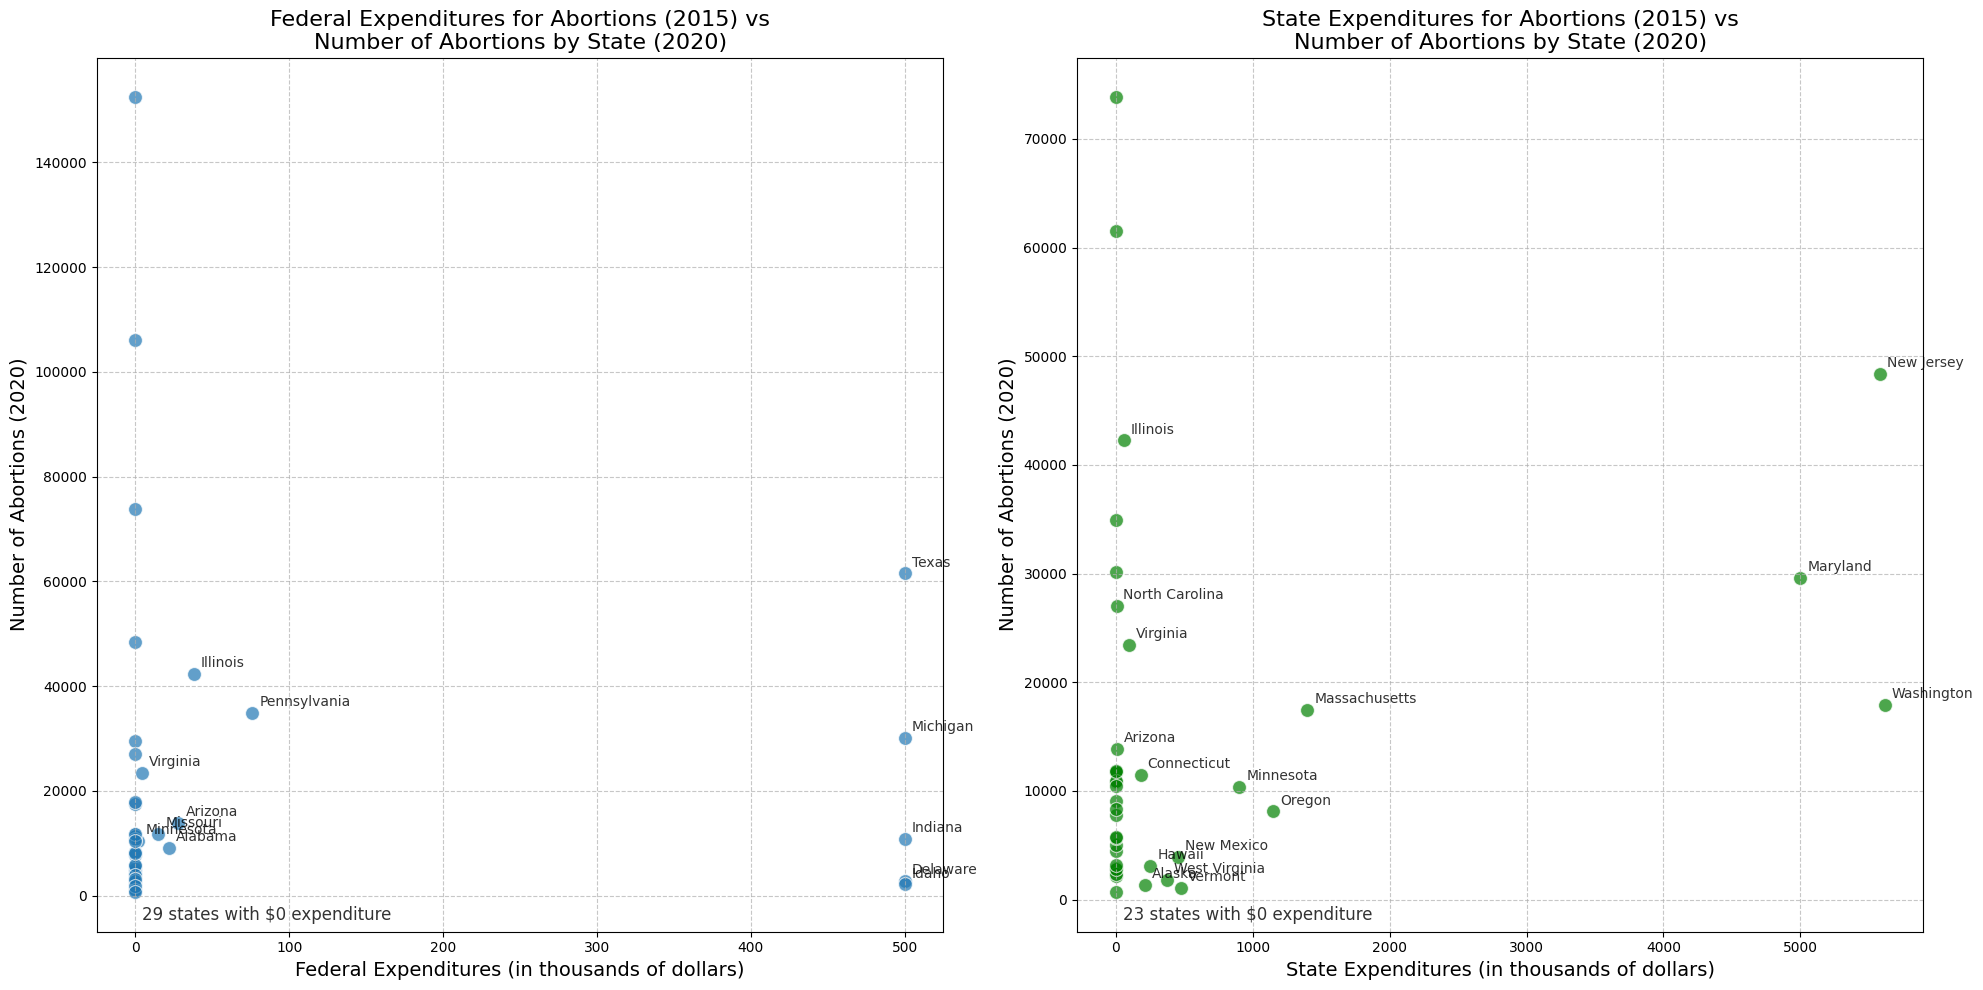

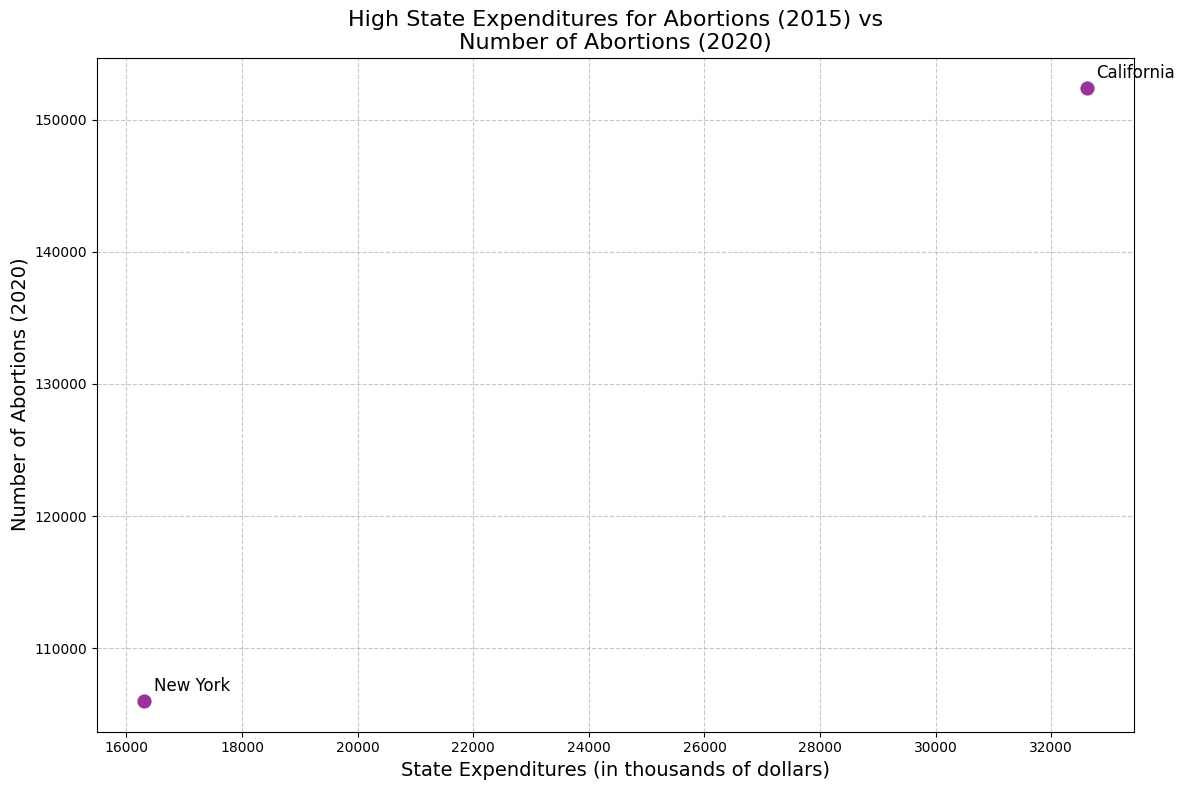

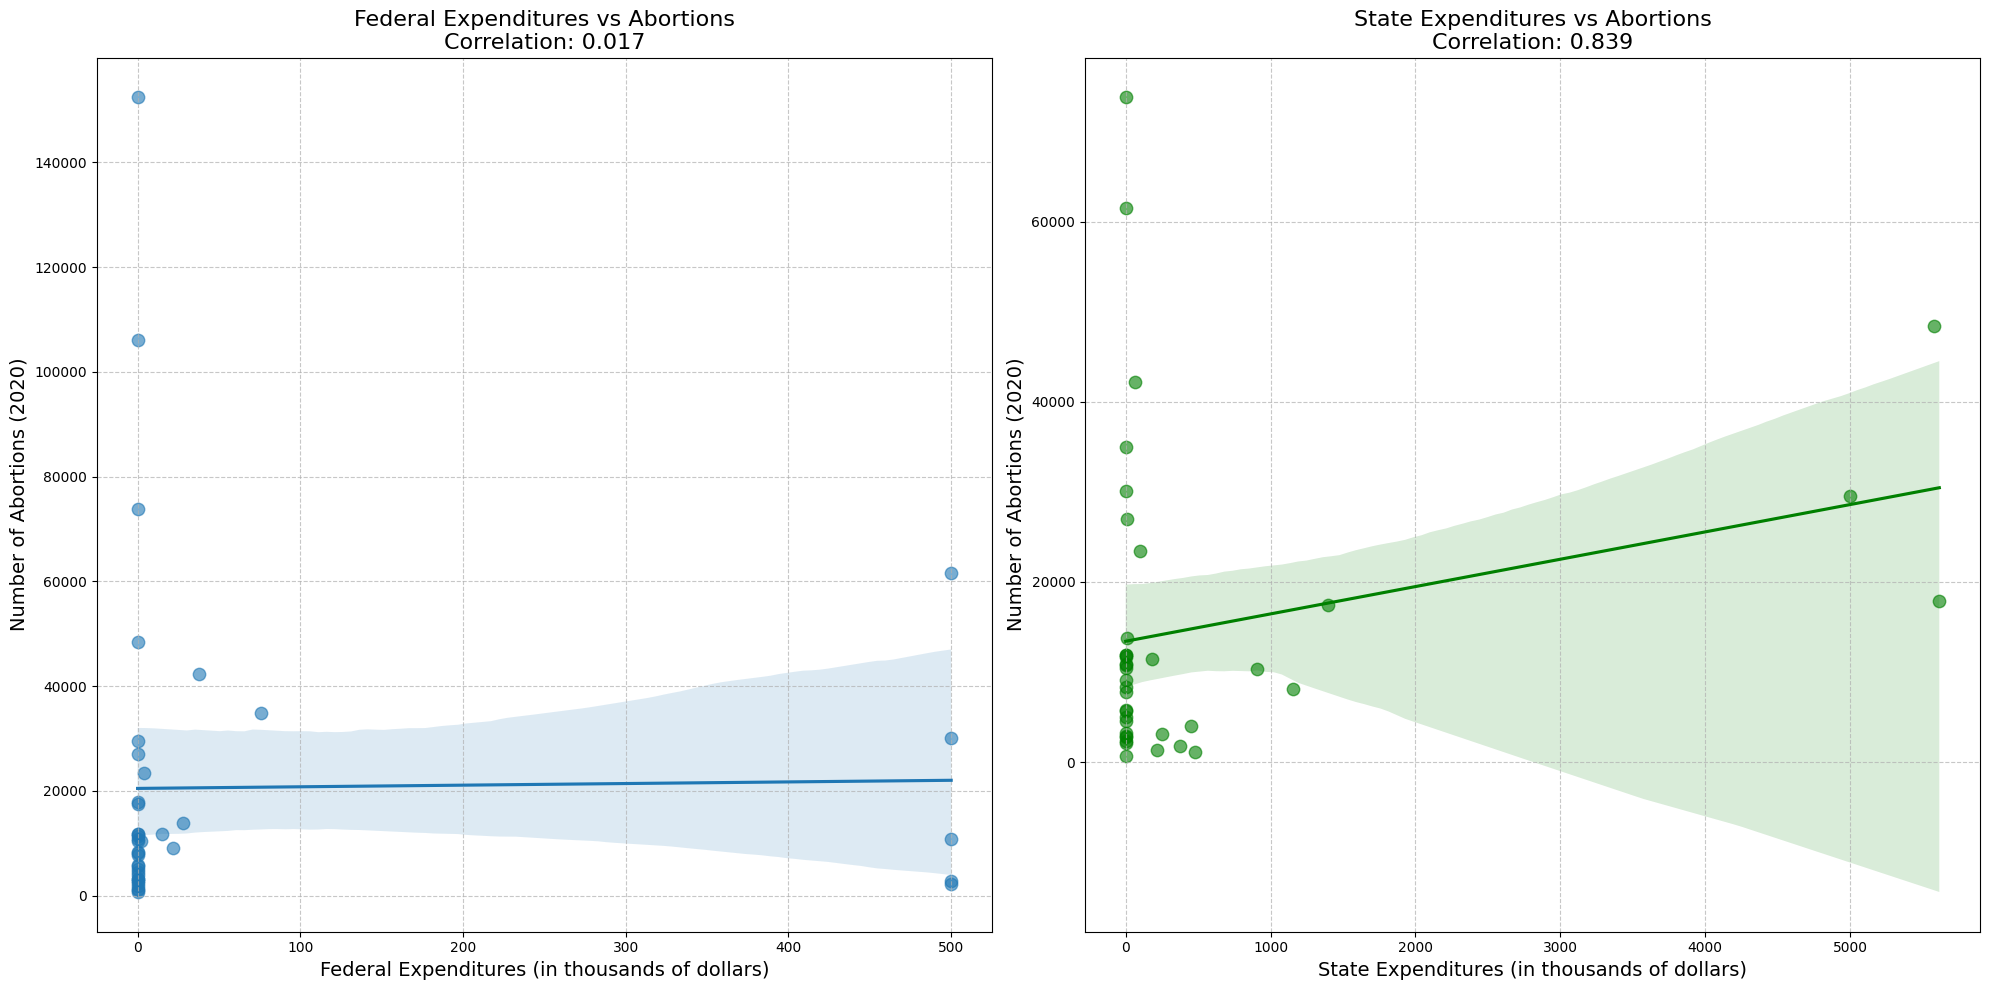

In [8]:
# Create a DataFrame from the provided data
# The data is complex, so we'll need to extract the relevant columns

# First, create a list of states
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
    'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Extract the data from the document
# Note: Based on the document, we need these columns:
# 1. "Reported public expenditures for abortions (in 000s of dollars), federal, 2015"
# 2. "Reported public expenditures for abortions (in 000s of dollars), state, 2015"
# 3. "No. of abortions, by state of residence, 2020"

# Create a mapping between the columns in the data and what we want
# federal_expenditures = [
#     22, 0, 28, 0, 0, 0, 0, '<1,000', 0, 0, 298, 0, '<1,000', 38, '<1,000', 0, 0, 0, 0, 0,
#     0, 0, '<1,000', 2, 0, 15, 'unavailable', 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 76, 0, 0, 0,
#     0, '<1000', 0, 0, 4, 0, 0, 0, 0
# ]
federal_expenditures = abortion['Reported public expenditures for abortions (in 000s of dollars), federal, 2015'].values

# state_expenditures = [
#     0, 216, 11, 0, 32613, 0, 184, 0, 0, 0, 'nr', 253, 0, 61, 0, 'nr', 'nr', 0, 0, 0,
#     5000, 1400, 0, 904, 0, 0, 238, 'nr', 0, 'nr', 5580, 453, 16306, 7, 'nr', 'nr', 0, 1152,
#     0, 0, 0, 'nr', 0, 0, 0, 478, 97, 5617, 375, 'nr', 0
# ]
state_expenditures = abortion['Reported public expenditures for abortions (in 000s of dollars), state, 2015'].values
abortions_2020 = [
    9060, 1320, 13820, 4510, 152400, 11830, 11460, 2870, 5010, 73830, 36470, 3120, 2130,
    42250, 10810, 3510, 4120, 5690, 7760, 2370, 29590, 17460, 30150, 10380, 5760, 11710,
    1510, 2020, 10870, 2150, 48390, 3950, 105990, 27030, 960, 21920, 8330, 8110, 34950,
    2830, 11830, 680, 10450, 61500, 3220, 1100, 23390, 17910, 1780, 8290, 700
]
abortions_2020 = abortion['No. of abortions, by state of residence, 2020'].values
# Process the data for analysis
# Handle non-numeric values
def process_expenditures(expenditure_list):
    processed = []
    for value in expenditure_list:
        if value == '<1,000' or value == '<1000':
            processed.append(1)  # Assuming half of the maximum value
        elif value == 'nr' or value == 'unavailable':
            processed.append(np.nan)  # Use NaN for missing values
        else:
            processed.append(float(value))
    return processed

federal_expenditures_processed = process_expenditures(federal_expenditures)
state_expenditures_processed = process_expenditures(state_expenditures)

# Create DataFrame
df = pd.DataFrame({
    'State': states,
    'Federal_Expenditures_2015': federal_expenditures_processed,
    'State_Expenditures_2015': state_expenditures_processed,
    'Abortions_2020': abortions_2020
})

# Remove rows with missing values for the plots
df_plot = df.dropna()

# Create a figure with two subplots side by side
plt.figure(figsize=(20, 10))

# First subplot - Federal Expenditures vs Number of Abortions
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_plot, x='Federal_Expenditures_2015', y='Abortions_2020', s=100, alpha=0.7)
plt.title('Federal Expenditures for Abortions (2015) vs\nNumber of Abortions by State (2020)', fontsize=16)
plt.xlabel('Federal Expenditures (in thousands of dollars)', fontsize=14)
plt.ylabel('Number of Abortions (2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add state labels to the points
for i, row in df_plot.iterrows():
    if row['Federal_Expenditures_2015'] > 0:  # Only label non-zero values
        plt.annotate(row['State'], 
                    (row['Federal_Expenditures_2015'], row['Abortions_2020']),
                    fontsize=10,
                    alpha=0.8,
                    xytext=(5, 5),
                    textcoords='offset points')

# Handle states with zero federal expenditures separately
zero_fed_exp = df_plot[df_plot['Federal_Expenditures_2015'] == 0]
if len(zero_fed_exp) > 0:
    plt.annotate(f"{len(zero_fed_exp)} states with $0 expenditure", 
                (0, min(zero_fed_exp['Abortions_2020'])),
                fontsize=12,
                alpha=0.8,
                xytext=(5, -20),
                textcoords='offset points')

# Second subplot - State Expenditures vs Number of Abortions
plt.subplot(1, 2, 2)
# Filter out extremely high values for better visualization
df_plot_filtered = df_plot[df_plot['State_Expenditures_2015'] < 10000]
sns.scatterplot(data=df_plot_filtered, x='State_Expenditures_2015', y='Abortions_2020', s=100, alpha=0.7, color='green')
plt.title('State Expenditures for Abortions (2015) vs\nNumber of Abortions by State (2020)', fontsize=16)
plt.xlabel('State Expenditures (in thousands of dollars)', fontsize=14)
plt.ylabel('Number of Abortions (2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add state labels to the points
for i, row in df_plot_filtered.iterrows():
    if row['State_Expenditures_2015'] > 0:  # Only label non-zero values
        plt.annotate(row['State'], 
                    (row['State_Expenditures_2015'], row['Abortions_2020']),
                    fontsize=10,
                    alpha=0.8,
                    xytext=(5, 5),
                    textcoords='offset points')

# Handle states with zero state expenditures separately
zero_state_exp = df_plot_filtered[df_plot_filtered['State_Expenditures_2015'] == 0]
if len(zero_state_exp) > 0:
    plt.annotate(f"{len(zero_state_exp)} states with $0 expenditure", 
                (0, min(zero_state_exp['Abortions_2020'])),
                fontsize=12,
                alpha=0.8,
                xytext=(5, -20),
                textcoords='offset points')

plt.tight_layout()
plt.savefig('abortion_expenditures_vs_abortions.png', dpi=300, bbox_inches='tight')

# Create an additional visualization for states with very high expenditures
high_exp_states = df_plot[df_plot['State_Expenditures_2015'] >= 10000]
if len(high_exp_states) > 0:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=high_exp_states, x='State_Expenditures_2015', y='Abortions_2020', s=120, alpha=0.8, color='purple')
    plt.title('High State Expenditures for Abortions (2015) vs\nNumber of Abortions (2020)', fontsize=16)
    plt.xlabel('State Expenditures (in thousands of dollars)', fontsize=14)
    plt.ylabel('Number of Abortions (2020)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add state labels
    for i, row in high_exp_states.iterrows():
        plt.annotate(row['State'], 
                    (row['State_Expenditures_2015'], row['Abortions_2020']),
                    fontsize=12,
                    alpha=1.0,
                    xytext=(7, 7),
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.savefig('high_expenditure_states.png', dpi=300, bbox_inches='tight')

# Calculate correlation coefficients
federal_corr = df_plot['Federal_Expenditures_2015'].corr(df_plot['Abortions_2020'])
state_corr = df_plot['State_Expenditures_2015'].corr(df_plot['Abortions_2020'])

print(f"Correlation between Federal Expenditures and Number of Abortions: {federal_corr:.3f}")
print(f"Correlation between State Expenditures and Number of Abortions: {state_corr:.3f}")

# Display the table of the data
print("\nData used for analysis:")
print(df[['State', 'Federal_Expenditures_2015', 'State_Expenditures_2015', 'Abortions_2020']].head(10))
print("...")

# Optional: Create regression plots to better visualize the relationships
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.regplot(data=df_plot, x='Federal_Expenditures_2015', y='Abortions_2020', 
           scatter_kws={'alpha':0.6, 's':80})
plt.title(f'Federal Expenditures vs Abortions\nCorrelation: {federal_corr:.3f}', fontsize=16)
plt.xlabel('Federal Expenditures (in thousands of dollars)', fontsize=14)
plt.ylabel('Number of Abortions (2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.regplot(data=df_plot_filtered, x='State_Expenditures_2015', y='Abortions_2020', 
           scatter_kws={'alpha':0.6, 's':80}, color='green')
plt.title(f'State Expenditures vs Abortions\nCorrelation: {state_corr:.3f}', fontsize=16)
plt.xlabel('State Expenditures (in thousands of dollars)', fontsize=14)
plt.ylabel('Number of Abortions (2020)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('abortion_expenditures_regression.png', dpi=300, bbox_inches='tight')

plt.show()